In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('data/train.csv', parse_dates=['timestamp'])

In [19]:
print("Shape of dataframe:", df.shape)
df.head()

Shape of dataframe: (698675, 13)


,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,1,2016-01-01,0.0,Education,2720,2004,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,2,2016-01-01,0.0,Education,5376,1991,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,3,2016-01-01,0.0,Education,23685,2002,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,4,2016-01-01,0.0,Education,116607,1975,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,5,2016-01-01,0.0,Education,8000,2000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698675 entries, 0 to 698674
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   building_id         698675 non-null  int64         
 1   timestamp           698675 non-null  datetime64[ns]
 2   meter_reading       698675 non-null  float64       
 3   primary_use         698675 non-null  object        
 4   square_feet         698675 non-null  int64         
 5   year_built          698675 non-null  int64         
 6   air_temperature     698452 non-null  float64       
 7   cloud_coverage      394159 non-null  float64       
 8   dew_temperature     698452 non-null  float64       
 9   precip_depth_1_hr   698591 non-null  float64       
 10  sea_level_pressure  691953 non-null  float64       
 11  wind_direction      678753 non-null  float64       
 12  wind_speed          698675 non-null  float64       
dtypes: datetime64[ns](1), float64

In [22]:
df.isnull().sum()

building_id                0
timestamp                  0
meter_reading              0
primary_use                0
square_feet                0
year_built                 0
air_temperature          223
cloud_coverage        304516
dew_temperature          223
precip_depth_1_hr         84
sea_level_pressure      6722
wind_direction         19922
wind_speed                 0
dtype: int64

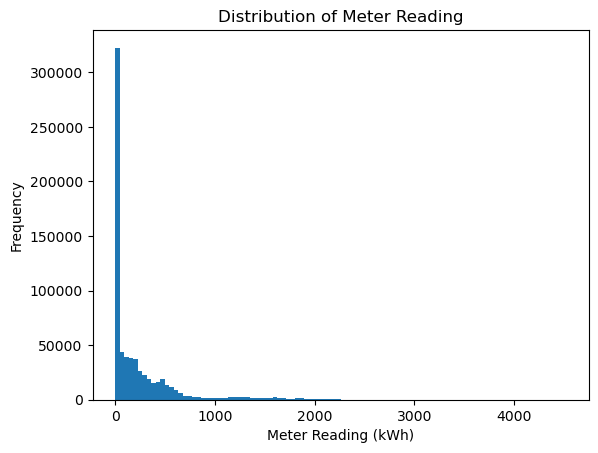

In [23]:
plt.figure()
plt.hist(df['meter_reading'], bins=100)
plt.xlabel('Meter Reading (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Meter Reading')
plt.show()


In [25]:
df['primary_use'].value_counts()

primary_use
Education                        199874
Lodging/residential              189669
Office                           141949
Parking                           56246
Retail                            42175
Entertainment/public assembly     34665
Other                             34097
Name: count, dtype: int64

In [27]:
df['meter_reading'].describe()

count    698675.000000
mean        231.255069
std         382.396065
min           0.000000
25%           0.000000
50%          71.259300
75%         302.715000
max        4521.000000
Name: meter_reading, dtype: float64

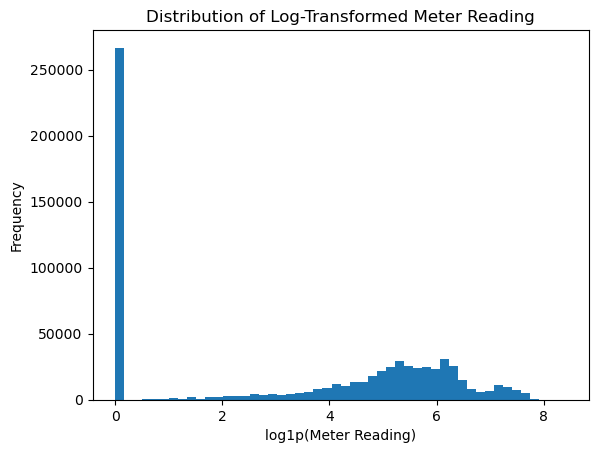

In [30]:
meter_log = np.log1p(df['meter_reading'])
plt.hist(meter_log, bins=50)
plt.title('Distribution of Log-Transformed Meter Reading')
plt.xlabel('log1p(Meter Reading)')
plt.ylabel('Frequency')
plt.show()